# 1. 자동 미분을 이용한 선형 회귀 구현

## 자동 미분

In [ ]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행합니다. 임의로 2w^2+5라는 식을 세워보고, w에 대해 미분해보겠습니다.

In [ ]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [ ]:
type(w)

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [ ]:
f(w)

<tf.Tensor: shape=(), dtype=float32, numpy=13.0>

이제 gradients를 출력하면 w에 대해 미분한 값이 저장된 것을 확인할 수 있습니다.

In [ ]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 선형 회귀 구현하기

In [ ]:
# 선형회귀 모델(Wx + b)을 위한 tf.Variable을 선언합니다.
W = tf.Variable(tf.random.normal(shape=[1])) # 랜덤으로 초기값 정의
b = tf.Variable(tf.random.normal(shape=[1])) # 랜덤으로 초기값 정의

In [ ]:
W

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.82893634], dtype=float32)>

In [ ]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.09841593], dtype=float32)>

### 1. 가설 정의

@tf.function를 추가하면 파이썬 코드가 동일한 텐서플로 코드로 변경됩니다.  
이렇게 하면 성능을 최적화 할 수 있습니다.  

모든 파이썬 함수에 tf.function 데코레이터를 적용할 필요는 없습니다.  
모델 훈련의 한 단계(step)나 정방향 연산(forward pass) 같은 고수준 연산에만 tf.function 데코레이터를 적용하세요.

In [ ]:
@tf.function
def linear_model(x):
  return W*x + b

### 2. 손실 함수 정의

In [ ]:
# 손실 함수를 정의합니다.
# MSE 손실함수 \mean{(y' - y)^2}
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

### 3. 옵티마이저 정의 (경사 하강법)

파라미터를 업데이트 하는 한 순간을 step이라고 하였을 때,  
그 한 순간을 정의한 함수를 train_step이라는 이름의 함수로 작성하였습니다.  

아래의 내용은 이해가 안 되면 일단 처음에는 암기를 해도 무방할 만큼, TF 2.0에서는 당연하게 사용되는 패턴입니다.  
물론 앞으로의 강의에서는 이보다도 더 쉬운 Keras 패턴을 사용할 것입니다.

In [ ]:
# 최적화를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
# 사용자가 정한 learning rate 값을 SGD()에 작성하면 됩니다.
optimizer = tf.optimizers.SGD(0.01)

# 첫번째 인자인 x는 입력 데이터
# 두번째 인자인 y는 레이블
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = linear_model(x)
    # MSE를 계산
    loss = mse_loss(y_pred, y)
  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(loss, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# 트레이닝을 위한 입력값과 출력값을 준비합니다.
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# 경사하강법을 1000번 수행합니다.
for i in range(1000):
  if (i + 1) % 100 == 0:
    print((i + 1),'회 학습')
  train_step(x_train, y_train)

100 회 학습
200 회 학습
300 회 학습
400 회 학습
500 회 학습
600 회 학습
700 회 학습
800 회 학습
900 회 학습
1000 회 학습


In [ ]:
# 테스트를 위한 입력값을 준비합니다.
x_test = [3.5, 5, 5.5, 6]
# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=2x)을 잘 학습했는지 측정합니다.

# 예상되는 참값 : [7, 10, 11, 12]
# print(linear_model(x_test))
print(linear_model(x_test).numpy())

[ 7.006247  10.022984  11.028563  12.0341425]


# 케라스를 이용한 선형 회귀 구현

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

첫번째 인자인 1은 출력의 차원을 정의하며, 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다. 실습을 진행해봅시다.

In [ ]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X, y, batch_size=1, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
9/9 [==============================] - 2s 2ms/step - loss: 910.0246 - mse: 910.0246
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1723 - mse: 2.1723
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 0.7889 - mse: 0.7889
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.8502 - mse: 2.8502
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 1.9642 - mse: 1.9642
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 1.9232 - mse: 1.9232
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 5.6578 - mse: 5.6578
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 1.3856 - mse: 1.3856
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 2.3954 - mse: 2.3954
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0981 - mse: 2.0981
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 4.4

In [ ]:
model.predict(X)

array([[11.647945],
       [22.328596],
       [33.009247],
       [43.689896],
       [54.370544],
       [65.05119 ],
       [75.73184 ],
       [86.41249 ],
       [97.09314 ]], dtype=float32)

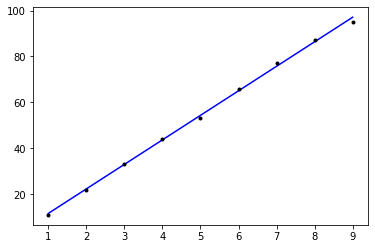

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')